## 數位訊號處理 Digital Signal Processing

### Think DSP模組 Think DSP module

Python模組`thinkdsp`提供處理訊號的類別及函數 `thinkdsp` is a module that accompanies _Think DSP_ and provides classes and functions for working with signals.

[Documentation of the thinkdsp module is here](http://greenteapress.com/thinkdsp.html). 

In [3]:
# Get thinkdsp.py
# Only for Linux and Mac OS
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### 聲音與訊號 Sounds and signals: 訊號基本觀念 Basic Concept of Signals

### 訊號 Signals

運用下面兩模組：Utilizing the following two modules:

* `thinkdsp`：提供訊號處理的類別與函數。Provide classes and functions for signal processing.

* `thinkplot`：提供訊號繪圖函數，是繪圖套件matplotlib內函數的封裝API。Provide classes and functions for signal plotting, it's a wrapper API of matplotlib's functions.

In [4]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot # for functions CosSignal and SinSignal

import numpy as np

# ipywidgets: 互動式HTML小工具 Interactive HTML widgets for Jupyter notebooks and the IPython kernel.
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

實作餘弦與正弦訊號 Instantiate cosine and sine signals.

In [5]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)

檢視物件cos_sig的類別 Check the type of object `cos_sig`

In [6]:
type(cos_sig)

thinkdsp.Sinusoid

In [7]:
cos_sig

瞭解Sinusoid訊號類別(Signal class)下的屬性和方法：Attributes and methods under object Sinusoid of class Signal:

> 屬性 Attributes

- 振幅 'amp', 浮點數 float
- 頻率 'freq', 整數 int
- 偏移量 'offset', 整數 int
- 周期 'period', 浮點數 float

> 方法 Methods

- 取樣計算函數 'evaluate', method
- 形成波形函數 'make_wave', method
- 繪圖函數 'plot', method


勿忘句點語法！

In [8]:
# dir(cos_sig)
[(name, type(getattr(cos_sig, name))) for name in dir(cos_sig)]

[('__add__', method),
 ('__class__', type),
 ('__delattr__', method-wrapper),
 ('__dict__', dict),
 ('__dir__', builtin_function_or_method),
 ('__doc__', str),
 ('__eq__', method-wrapper),
 ('__format__', builtin_function_or_method),
 ('__ge__', method-wrapper),
 ('__getattribute__', method-wrapper),
 ('__gt__', method-wrapper),
 ('__hash__', method-wrapper),
 ('__init__', method),
 ('__init_subclass__', builtin_function_or_method),
 ('__le__', method-wrapper),
 ('__lt__', method-wrapper),
 ('__module__', str),
 ('__ne__', method-wrapper),
 ('__new__', builtin_function_or_method),
 ('__radd__', method),
 ('__reduce__', builtin_function_or_method),
 ('__reduce_ex__', builtin_function_or_method),
 ('__repr__', method-wrapper),
 ('__setattr__', method-wrapper),
 ('__sizeof__', builtin_function_or_method),
 ('__str__', method-wrapper),
 ('__subclasshook__', builtin_function_or_method),
 ('__weakref__', NoneType),
 ('amp', float),
 ('evaluate', method),
 ('freq', int),
 ('func', numpy.ufunc

振幅為標準值域的比例，預設為1 The default setting of amplitude is 100%.

請用句點語法 Dot syntax please.

In [9]:
cos_sig.amp

1.0

預設頻率為 440 Hertz The default setting of frequency is 440 Hertz.

In [10]:
cos_sig.freq

440

預設偏移量為 0 The default setting of offset is 0 (What time should we start the wave ?)

In [11]:
cos_sig.offset

0

周期是每 1/440 秒循環一次 The period of each cycle is 1/440 second.

In [12]:
cos_sig.period

0.0022727272727272726

驗證頻率的倒數是周期 Verify the reciprocal of frequency is period.

In [13]:
1/cos_sig.freq

0.0022727272727272726

In [14]:
help(cos_sig.evaluate)

Help on method evaluate in module thinkdsp:

evaluate(ts) method of thinkdsp.Sinusoid instance
    Evaluates the signal at the given times.
    
    ts: float array of times
    
    returns: float wave array



繪製正弦與餘弦訊號，`plot`函數預設繪製三個週期 Plot the sine and cosine signals.  By default, `plot` plots three periods.  

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


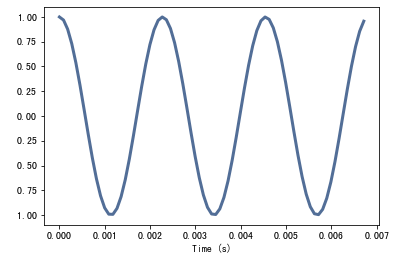

In [15]:
cos_sig.plot()
thinkplot.config(xlabel='Time (s)')

請注意正弦訊號的頻率是餘弦訊號的兩倍，所以三個週期的時間剛好是一半(0.0035 * 2 = 0.007) Notice that the frequency of the sine signal is doubled, so the period is halved.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


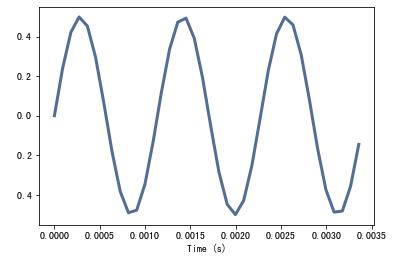

In [16]:
sin_sig.plot()
thinkplot.config(xlabel='Time (s)')

兩波加總為SumSignal The sum of two signals is a SumSignal.

In [17]:
mix = sin_sig + cos_sig
mix

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


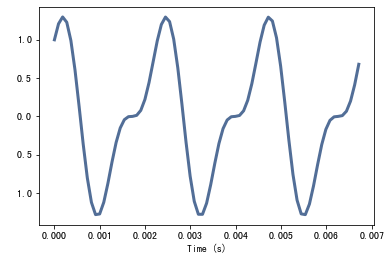

In [18]:
mix.plot()
#decorate(xlabel='Time (s)')
thinkplot.config(xlabel='Time (s)')

請參閱`thinkdsp.py`的線上使用說明: http://greenteapress.com/thinkdsp/thinkdsp.html Please consult online documentation http://greenteapress.com/thinkdsp/thinkdsp.html

### 時波 Waves

- 前述訊號是連續值的數學函數，其自變數為時間。如果沿著離散且等距的時間點取樣(每秒取樣數稱為取樣率framerate)，並計算其訊號值，即形成訊號的近似波形。 A Signal represents a mathematical function defined for **all** values of time.  If you evaluate a signal at a sequence of equally-spaced times, the result is a **Wave**.  `framerate` is the number of samples per second (i.e. **sampling rate**).

In [19]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [20]:
type(wave)

thinkdsp.Wave

瞭解近似波形(Waves class)下的屬性和方法： Attributes and methods under object `wave` of class Wave:

> Attributes 屬性

- 取樣期間 'duration', 浮點數 float
- 取樣截止時間 'end', 浮點數 np.float64
- 取樣率，每秒多少樣本點 'framerate', 整數 int
- 取樣開始時間 'start', 浮點數 numpy.float64
- 取樣的時間序列點 'ts', 一維向量 numpy.ndarray
- 對應的訊號值 'ys', 一維向量 numpy.ndarray

> Methods 方法

- 音訊生成函數 'make_audio', method
- 頻譜圖生成函數 'make_spectrogram', method
- 頻譜生成函數 'make_spectrum', method
- 切斷函數 'segment', method

時間點稱frame，對應量測值稱為sample

In [21]:
# dir(wave)
[(name, type(getattr(wave, name))) for name in dir(wave)]

[('__add__', method),
 ('__class__', type),
 ('__delattr__', method-wrapper),
 ('__dict__', dict),
 ('__dir__', builtin_function_or_method),
 ('__doc__', str),
 ('__eq__', method-wrapper),
 ('__format__', builtin_function_or_method),
 ('__ge__', method-wrapper),
 ('__getattribute__', method-wrapper),
 ('__gt__', method-wrapper),
 ('__hash__', method-wrapper),
 ('__init__', method),
 ('__init_subclass__', builtin_function_or_method),
 ('__le__', method-wrapper),
 ('__len__', method),
 ('__lt__', method-wrapper),
 ('__module__', str),
 ('__mul__', method),
 ('__ne__', method-wrapper),
 ('__new__', builtin_function_or_method),
 ('__or__', method),
 ('__radd__', method),
 ('__reduce__', builtin_function_or_method),
 ('__reduce_ex__', builtin_function_or_method),
 ('__repr__', method-wrapper),
 ('__setattr__', method-wrapper),
 ('__sizeof__', builtin_function_or_method),
 ('__str__', method-wrapper),
 ('__subclasshook__', builtin_function_or_method),
 ('__weakref__', NoneType),
 ('apodize',

In [22]:
wave.ys

array([1.        , 1.209102  , 1.29840734, ..., 0.14744616, 0.33476757,
       0.58844095])

In [23]:
wave.ys.shape

(5512,)

In [24]:
wave.framerate

11025

IPython提供播放波形的音訊小工具 IPython provides an Audio widget that can play a wave.

載入或儲存nb時會有錯誤的原因：
Same issue, with nbformat 5.0.4.
Happens when using widgets, like ipyaggrid. (https://github.com/jupyter-widgets/ipywidgets/issues/1305)

In [25]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

Wave物件也提供`make_audio()`方法 Wave also provides `make_audio()`, which does the same thing:

In [26]:
wave.make_audio()

屬性`ys`是Numpy陣列，包含訊號值，樣本間的區間是取樣率的倒數 The `ys` attribute is a NumPy array that contains the values from the signal.  The interval between samples is the inverse of the framerate.

In [27]:
print('Number of samples', len(wave.ys))
print('Timestep in ms', 1 / wave.framerate * 1000) # 毫秒ms

Number of samples 5512
Timestep in ms 0.09070294784580499


訊號物件如果是週期訊號，則有`period`屬性(非週期訊號無`period`屬性) Signal objects that represent periodic signals have a `period` attribute.

波形物件提供分割方法`segment`，可建立一個新的波形，此處我們拉出一個三個週期的波形 Wave provides `segment`, which creates a new wave.  So we can pull out a 3 period segment of this wave.

In [28]:
period = mix.period
segment = wave.segment(start=0, duration=period*3)
period

0.0022727272727272726

波形物件提供`plot`繪圖方法 Wave provides `plot`

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


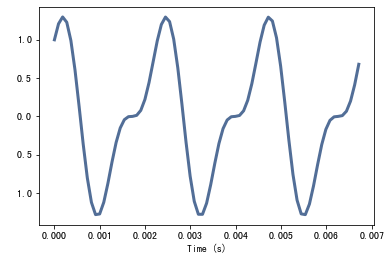

In [29]:
segment.plot()
thinkplot.config(xlabel='Time (s)')

正規化方法`normalize`讓值域不超過-1和1之間 `normalize` scales a wave so the range doesn't exceed -1 to 1.

In [30]:
wave.normalize()
wave.ys

array([0.76980075, 0.93076763, 0.99951495, ..., 0.11350416, 0.25770433,
       0.45298228])

`apodize`會逐漸縮小波形的開頭和結尾 `apodize` tapers the beginning and end of the wave so it doesn't click when you play it.

In [31]:
wave.apodize()
wave.ys

array([0.        , 0.00339696, 0.00729573, ..., 0.0008285 , 0.00094053,
       0.        ])

In [32]:
len(wave.ys)

5512

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


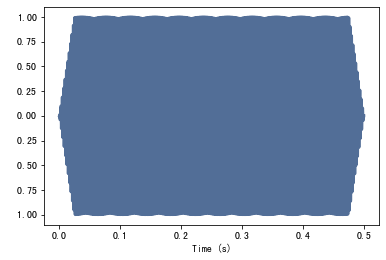

In [33]:
wave.plot()
thinkplot.config(xlabel='Time (s)')

In [34]:
help(wave.plot)

Help on method plot in module thinkdsp:

plot(**options) method of thinkdsp.Wave instance
    Plots the wave.



In [35]:
# wave.period

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


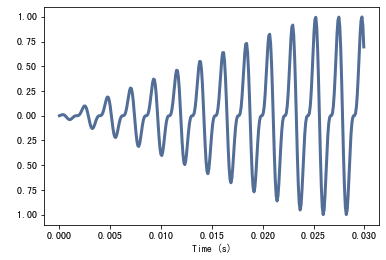

In [36]:
segment = wave.segment(start=0, duration=0.03)
segment.plot()
thinkplot.config(xlabel='Time (s)')

可將波形寫入WAV檔案 You can write a wave to a WAV file.

In [37]:
pwd

'/Users/Vince/GoogleDrive_HP/Python語言與工業人工智慧基礎/DSP'

In [38]:
wave.write('temp.wav')

Writing temp.wav


`wave.write`寫出後可使用外部播放器 `wave.write` writes the wave to a file so it can be used by an exernal player.

In [39]:
thinkdsp.play_wave(filename='temp.wav', player='aplay')

`read_wave`讀入WAV檔案 `read_wave` reads WAV files.  The WAV examples in the book are from freesound.org.  In the contributors section of the book, I list and thank the people who uploaded the sounds I use.

In [40]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')

In [41]:
wave.make_audio()

拉出此段錄音的一小部分後進行繪圖，我們看不到清晰的波形，但可以看到包絡曲線，追踪了此段中振幅的變化。 I pulled out a segment of this recording where the pitch is constant.  When we plot the segment, we can't see the waveform clearly, but we can see the "envelope", which tracks the change in amplitude during the segment.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


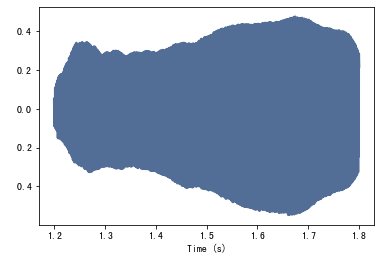

In [42]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


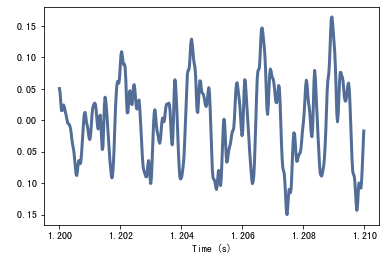

In [43]:
segment1 = wave.segment(start=1.2, duration=0.01)
segment1.plot()
thinkplot.config(xlabel='Time (s)')

### 頻譜 Spectrums

波形物件提供`make_spectrum`計算波形的頻譜 Wave provides `make_spectrum`, which computes the spectrum of the wave.

In [44]:
spectrum = segment.make_spectrum()

光譜物件Spectrum提供了繪圖方法`plot` Spectrum provides `plot`

x-軸: 頻率, y-軸: 振幅 x-axis: Frequency, y-axis: Amplitude

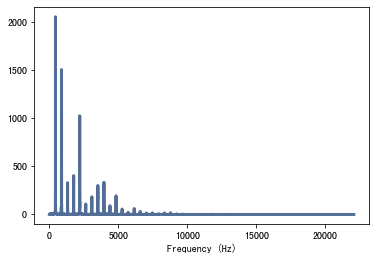

In [45]:
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

高於10kHz的頻率成份其振幅很小，設定橫軸的上限可更清楚地檢視低頻成份 The frequency components above 10 kHz are small.  We can see the lower frequencies more clearly by providing an upper bound:

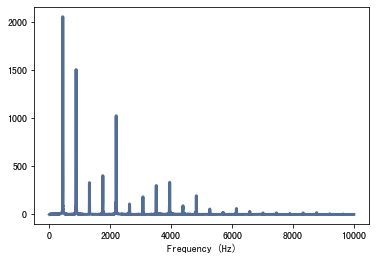

In [46]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')

低通過濾方法`low_pass`，它會衰減高於截止頻率的所有頻率分量。 Spectrum provides `low_pass`, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency.

In [47]:
spectrum.low_pass(3000)

結果是成份較少的光譜 The result is a spectrum with fewer components.

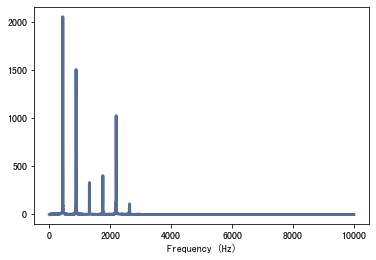

In [48]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')

可將濾波後的光譜再轉換回波形 We can convert the filtered spectrum back to a wave:

In [49]:
filtered = spectrum.make_wave()

正規化到-1和1之間 And then normalize it to the range -1 to 1.

In [50]:
filtered.normalize()

播放之前先將之切趾 Before playing it back, I'll apodize it (to avoid clicks).

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


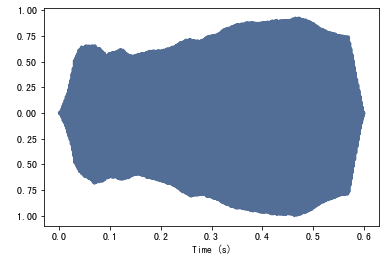

In [51]:
filtered.apodize()
filtered.plot()
thinkplot.config(xlabel='Time (s)')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


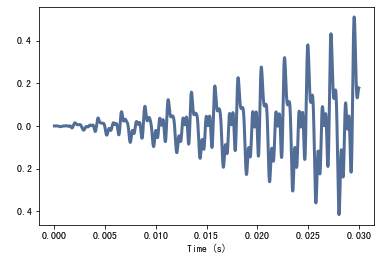

In [52]:
segment2 = filtered.segment(start=0, duration=0.03)
segment2.plot()
thinkplot.config(xlabel='Time (s)')

對原來區段的波形進行相同操作 And I'll do the same with the original segment.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


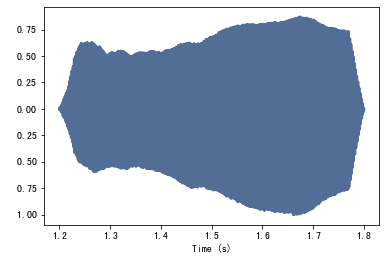

In [53]:
segment.normalize()
segment.apodize()
segment.plot()
thinkplot.config(xlabel='Time (s)')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


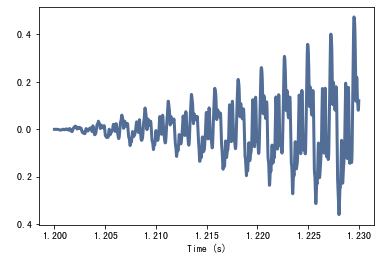

In [54]:
segment3 = segment.segment(start=1.2, duration=0.03)
segment3.plot()
thinkplot.config(xlabel='Time (s)')

聆聽原來的區段波形與過濾後的波形 Finally, we can listen to the original segment and the filtered version.

In [55]:
segment.make_audio()

高頻音被濾掉了 Some high frequency sounds have been filtered.

In [56]:
filtered.make_audio()

原始聲音聽起來更複雜，但有些高頻成分聽起來嗡嗡作響。過濾後的版本聽起來更像是純淨的音調，具有更加沉悶抑制的音質。我們選擇的截止頻率為3000 Hz，類似於電話線的音質，因此本例模擬了在電話上彈奏的小提琴錄音的聲音。

The original sounds more complex, with some high-frequency components that sound buzzy.
The filtered version sounds more like a pure tone, with a more muffled quality.  The cutoff frequency I chose, 3000 Hz, is similar to the quality of a telephone line, so this example simulates the sound of a violin recording played over a telephone.

**練習1**：執行下列程式碼區塊中的代碼，創建兩個頻率分量不同的訊號物件`Signal`，相加成混音訊號後，再創建一個包含半秒採樣訊號的混音波形物件`Wave`。

請增加可以計算和繪製此混音波形物件`Wave`頻譜的頻譜物件`Spectrum`。

**Exercise 1:** Run the code in the following cells to create a `Signal` with two frequency components, and then create a `Wave` that contains a half-second sample from the `Signal`.

Add code to compute and plot the `Spectrum` of this `Wave`.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


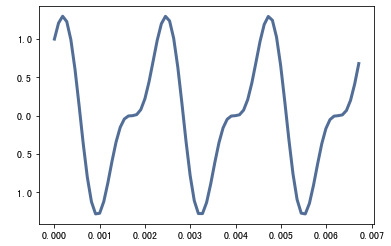

In [57]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
mix = cos_sig + sin_sig
mix.plot()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


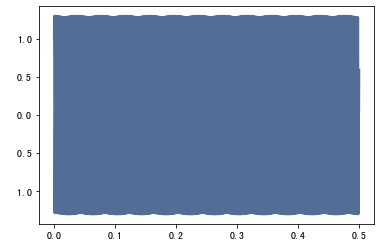

In [58]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave.plot()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


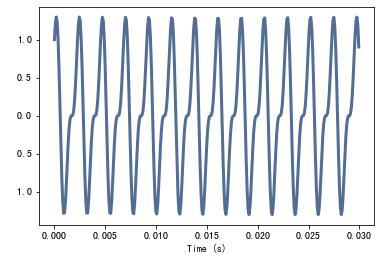

In [59]:
segment4 = wave.segment(start=0, duration=0.03)
segment4.plot()
thinkplot.config(xlabel='Time (s)')

### 交互作用 Interaction

以下範例說明如何使用互動式IPython小工具 The following example shows how to use interactive IPython widgets.

In [60]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    thinkplot.show(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

調整滑動鈕以控制音樂片段的開始時間、持續時間以及頻譜過濾的截斷頻率 Adjust the sliders to control the start and duration of the segment and the cutoff frequency applied to the spectrum.

In [61]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### 參考文獻：

Downey, A.B. (2014), Think DSP: Digital Signal Processing in Python, Green Tea Press.

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)